In [1]:
import obspy
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import yaml
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D

In [2]:
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
homedir = config['homedir']
readdir = config['readdir']

today = '2022-11-08T00:00:00'
early = '2002-01-01T00:00:00' #earliest time to show on bias plot
late = '2022-01-01T00:00:00' #latest time to show on bias plot

In [3]:
#parameters
volc_md = pd.read_csv(readdir+'Volcano_Metadata.csv') #read metadata
volc_md['netsta'] = volc_md['Network'].astype(str)+'.'+volc_md['Station'].astype(str) #get net.sta
volc_list_names = ['Baker','Hood','Newberry','Rainier','St_Helens'] # list of names of each volcano


# netsta = volc_md['netsta'].values.tolist() #make netsta a list
# start = volc_md['Starttime'].values.tolist() #make starttimes a list
# end = volc_md['Endtime'].values.tolist() #make endtimes a list
# for ii,i in enumerate(end): #change the foreseeable future endtimes (2599-12-31T23:59:59) to today's date
#     if i == '2599-12-31T23:59:59':
#         end[ii]=today
label_names = ['Longer than or Equal to 20 Years','Between 20 and 3 Years','Shorter than or Equal to 3 Years, \
but Longer than 1','REDPy Catalog Starts',]
colors = ['green','blue','orange','red']

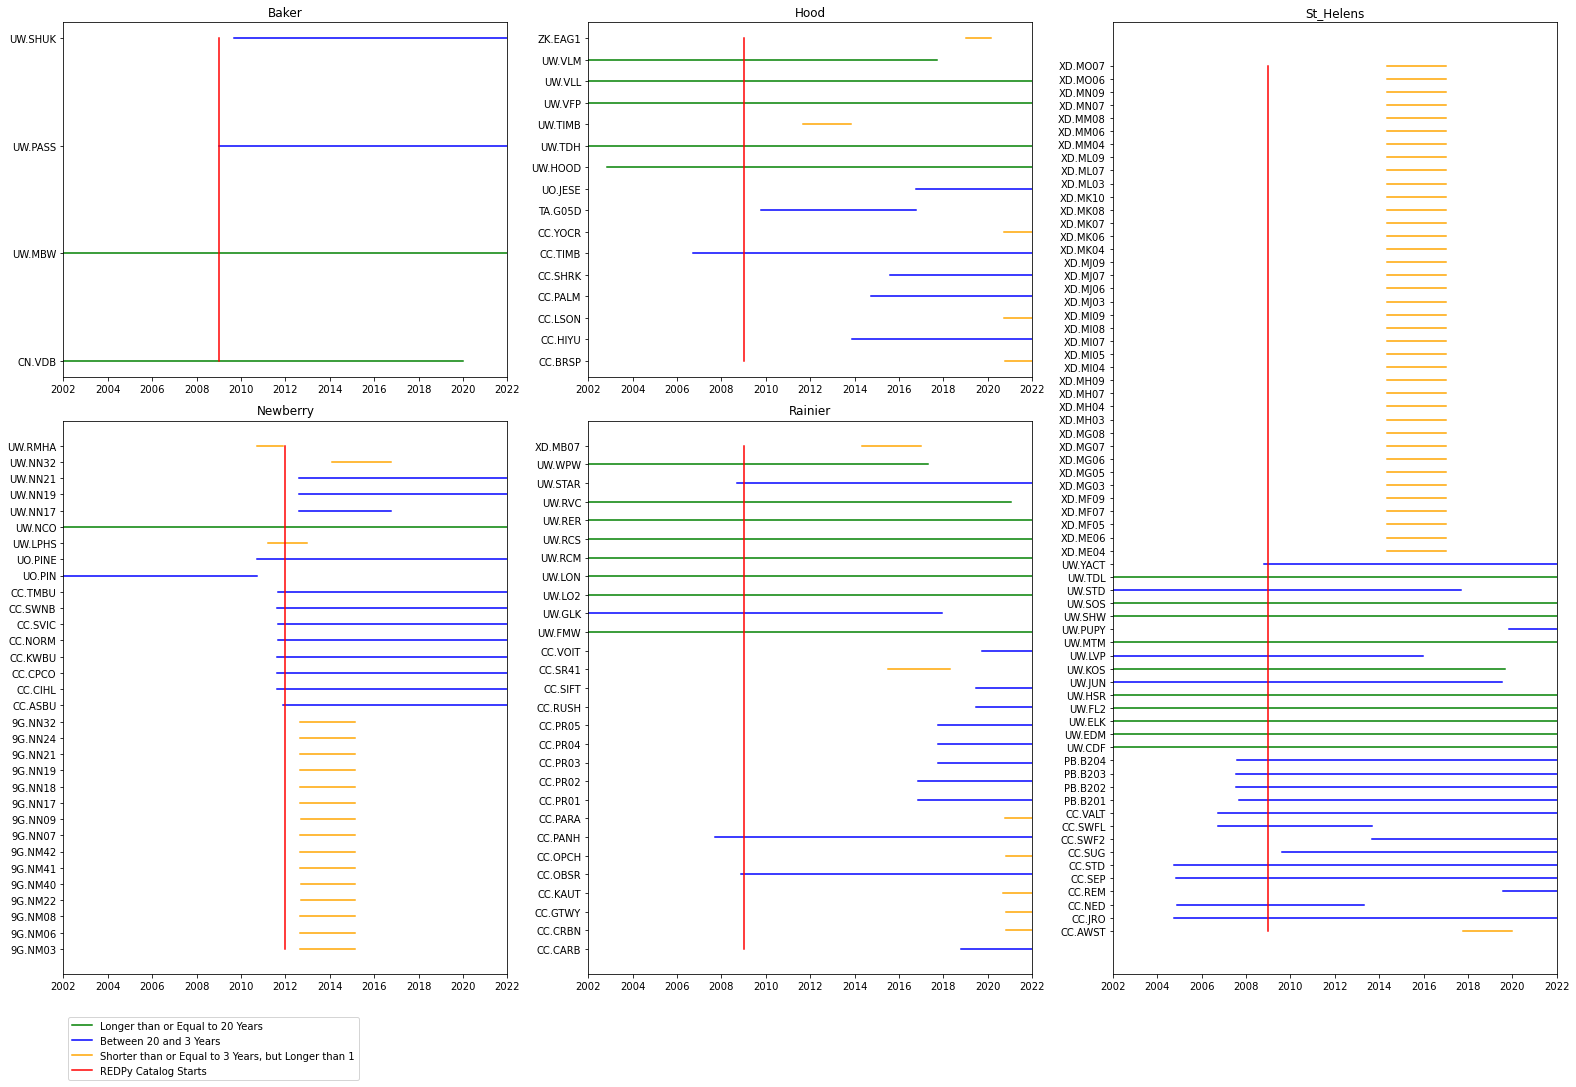

In [4]:
fig = plt.figure(figsize=(22,15)) #make the figure and set the size

gs = GridSpec(5, 3, figure=fig) #make GridSpec for formatting subplots
ax1 = fig.add_subplot(gs[:2, :1]) #Baker | make subplots (1 subplot/volcano) and set shape and location with GridSpec
ax1.set_xlim(pd.to_datetime([early,late])) #set x range from start of EQcorrscan detections to the end of 2021
ax2 = fig.add_subplot(gs[:2, 1:2]) #Hood
ax2.set_xlim(pd.to_datetime([early,late]))
ax3 = fig.add_subplot(gs[2:5, 0]) #Newberry
ax3.set_xlim(pd.to_datetime([early,late]))
ax4 = fig.add_subplot(gs[2:5, -2]) #Rainier
ax4.set_xlim(pd.to_datetime([early,late]))
ax5 = fig.add_subplot(gs[:, -1]) #St. Helens
ax5.set_xlim(pd.to_datetime([early,late]))


axs = [ax1,ax2,ax3,ax4,ax5] #make list of subplots to loop through
red_dates = ['2009-01-01','2009-01-01','2012-01-01','2009-01-01','2009-01-01'] #REDPy start times for each volcano, in order of volc_list_names

for vv,v in enumerate(volc_list_names): #for each volcano
#     print(v)
    netsta = volc_md[volc_md['Volcano_Name']==v]['netsta'].values.tolist() #find the stations on that volcano
    start = volc_md[volc_md['Volcano_Name']==v]['Starttime'].values.tolist() #find station starttimes
    end = volc_md[volc_md['Volcano_Name']==v]['Endtime'].values.tolist() #find station endtimes
    for ee,e in enumerate(end): #change the foreseeable future endtimes (2599-12-31T23:59:59) to a date that can be processed
        if e == '2599-12-31T23:59:59':
            end[ee]=today
    for ii,i in enumerate(netsta): #for each station on that volcano
#         print(i)
        x = pd.to_datetime([start[ii],end[ii]]) #find x values (starttime and endtime) for the station
        y = [netsta[ii],netsta[ii]] #find y values (name) for the station
        dif = UTCDateTime(end[ii])-UTCDateTime(start[ii]) #find the length of duration of the station
        if dif >= (3600*24*365*20): #if it is greater than or equal to 20 years long
            long_label = axs[vv].plot(x,y,label=label_names[0],color=colors[0]) #plot it in color 0, label 0
        if dif < (3600*24*365*20) and dif > (3600*24*365*3): #if it is between 20 and 3 years
            med_label = axs[vv].plot(x,y,label=label_names[1],color=colors[1]) #plot it in color 1, label 1
        if dif <= (3600*24*365*3): #if it is less than or equal to 3 years
            short_label = axs[vv].plot(x,y,label=label_names[2],color=colors[2]) #plot it in color 2, label 2
    redpy_label = axs[vv].plot([pd.to_datetime(red_dates[vv]),pd.to_datetime(red_dates[vv])],[netsta[0],netsta[-1]],color=colors[3],
            label = label_names[3]) #plot REDPy Catalog Start
    axs[vv].set_title(volc_list_names[vv])

ax3.legend(handles=[long_label[0], med_label[0], short_label[0], redpy_label[0]],bbox_to_anchor=(0, -.2), loc='lower left')
fig.tight_layout() #fix spacing between subplots
plt.show
plt.savefig('/home/smocz/expand_redpy/bias_plot.png')

### Testing Zone

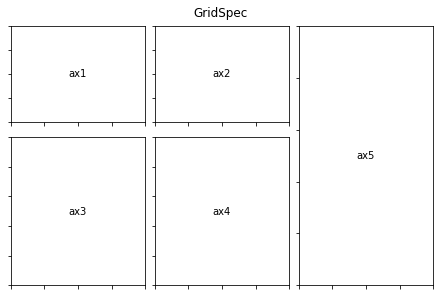

In [5]:
#practicing gridspec for better organization of charts

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True)

gs = GridSpec(5, 3, figure=fig)
ax1 = fig.add_subplot(gs[:2, :1])
ax2 = fig.add_subplot(gs[:2, 1:2])
ax3 = fig.add_subplot(gs[2:5, 0])
ax4 = fig.add_subplot(gs[2:5, -2])
ax5 = fig.add_subplot(gs[:, -1])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

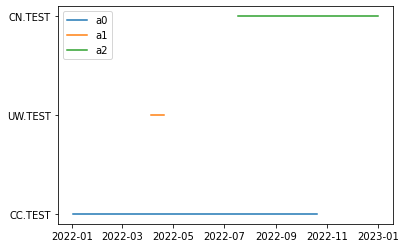

In [6]:
netsta = ['CC.TEST','UW.TEST','CN.TEST']
start = ['2022-01-02','2022-04-05','2022-07-18']
end = ['2022-10-20','2022-04-20','2022-12-31']
for i in range(0,len(netsta)):
    x = pd.to_datetime([start[i],end[i]])
    y = [netsta[i],netsta[i]]
    plt.plot(x,y,label='a'+str(i))
plt.legend()
plt.show()

In [24]:
# create data
# x = [10,20,30,40,50]
y = [30,30,30]

x = pd.to_datetime(['2022-01-02','2022-04-05','2022-07-18'])

y2 = [20,30,40]

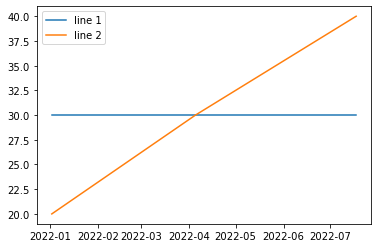

In [26]:
# plot lines
plt.plot(x, y, label = "line 1")
plt.plot(x, y2, label = "line 2")
plt.legend()
plt.show()

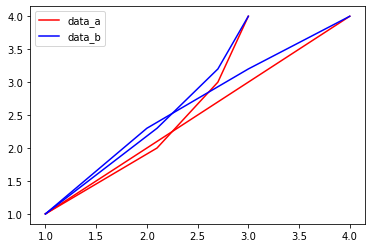

In [41]:
#how to label multiple lines without multiple spots in the legend
fig, ax = plt.subplots()

x=[1,2,3,4]
y=[1,2,3,4]

x1=[1,2.1,2.7,3]
y1=[1,2.3,3.2,4]

for x_opt in [x,x1]:
    for y_opt in [y]:
        data_a = ax.plot(x_opt,y_opt, label='data_a',color='red') #since there is more than one line under this name, it makes a list
for x_opt in [x,x1]:
    for y_opt in [y1]:
        data_b = ax.plot(x_opt,y_opt, label='data_b',color='blue') #since there is more than one line under this name, it makes a list


ax.legend(handles=[data_a[0],data_b[0]])